# <center>Кластеризация

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

**Задание 2.2**  
Вы узнали, что в соседнем районе построили пять студенческих общежитий, и решили, что будет отличной идеей открыть там пару ларьков с хот-догами. Изначальное положение общежитий и ваш план относительно ларьков выглядят следующим образом:

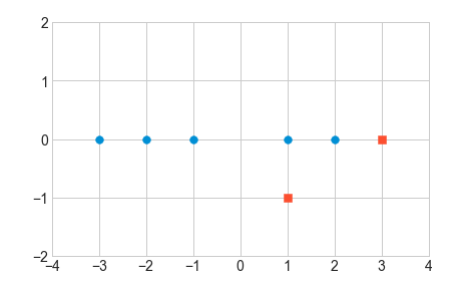

Здесь синие точки — общежития, красные — первоначальный план расположения ларьков.

Примените алгоритм k-means и найдите оптимальное расположение ларьков, чтобы расстояние до каждого из общежитий было минимальным (насколько это возможно, если ларьков всего два).

Известно, что у ларьков будут различные координаты по оси абсцисс.

Какой будет координата по оси абсцисс у ларька слева и справа? (необходимо найти центроиды)

In [3]:
shop = pd.DataFrame({
    'x': [-3, -2, -1, 1, 2],
    'y': [0, 0, 0, 0, 0]
})
km_model = KMeans(n_clusters=2).fit(shop)
shop['cluster'] = km_model.predict(shop)
display(shop)
print('Центроиды:')
print(km_model.cluster_centers_)

C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,x,y,cluster
0,-3,0,0
1,-2,0,0
2,-1,0,0
3,1,0,1
4,2,0,1


Центроиды:
[[-2.   0. ]
 [ 1.5  0. ]]


# <center>K-means и EM: практика
Набор данных представляет собой случайную выборку из 30 000 американских старшеклассников, у которых в 2006 году были профили в одной известной социальной сети, название которой авторы датасета не раскрывают в целях сохранения анонимности. Данные были отобраны равномерно для четырёх разных возрастов (предполагаемый год окончания школы — 2006–2009).

* gradyear — год выпуска;
* gender — пол;
* age — возраст;
* friends — число друзей в социальной сети;
* basketball, football, soccer, softball, volleyball, swimming, cheerleading, baseball, tennis, sports, cute, sex, sexy, hot, kissed, dance, band, marching, music, rock, god, church, jesus, bible, hair, dress, blonde, mall, shopping, clothes, hollister, abercrombie, die, death, drunk, drugs (переменные с пятой по сороковую) — частота встречаемости соответствующих слов в сообщениях подростка.

In [4]:
data = pd.read_csv('data/snsdata.zip')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


**Задание 4.1**  
Мы будем реализовывать алгоритм только на признаках, которые заключают в себе ключевые слова, встречающиеся в сообщениях подростка. Удалите все остальные признаки. Какова размерность вашего текущего набора данных?

In [5]:
drop_cols = ['gradyear', 'gender', 'age', 'friends']
data.drop(columns=drop_cols, inplace=True)
data.shape

(30000, 36)

**Задание 4.2**  
Теперь нормализуйте данные с помощью `StandardScaler()`.

In [6]:
data_scaled = StandardScaler().fit_transform(data)
data_scaled[0][0]

-0.3322172643985876

**Задание 4.3**  
Реализуйте алгоритм `k-means` c девятью кластерами. В качестве значения параметра `random_state` возьмите число `42`. Выведите получившееся значение инерции (`model.inertia_`).

In [9]:
km_model = KMeans(n_clusters=9, random_state=42).fit(data_scaled)
km_model.inertia_

C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


856276.6962467819

**Задание 4.4**  
Сколько подростков относится к много- и малочисленному классу?

In [8]:
clusters = pd.Series(km_model.predict(data_scaled))
clusters.value_counts(ascending=False)

2    19998
7     4366
1     2552
0      969
8      863
6      768
3      482
5        1
4        1
dtype: int64

**Задание 4.5**  
Подберите оптимальное количество кластеров с помощью `inertia` и `silhouette`

C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yellowbrick\utils\kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\yellowbrick\cluster\elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


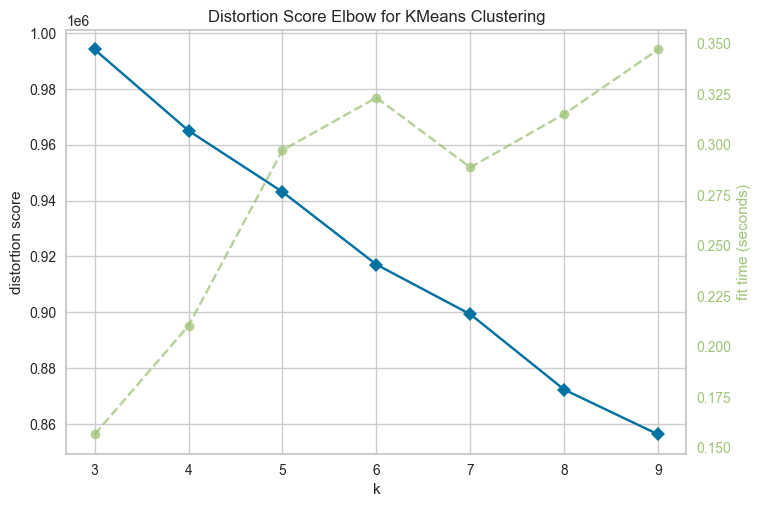

In [17]:
visualiser = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=(3, 10)).fit(data_scaled)
visualiser.show();

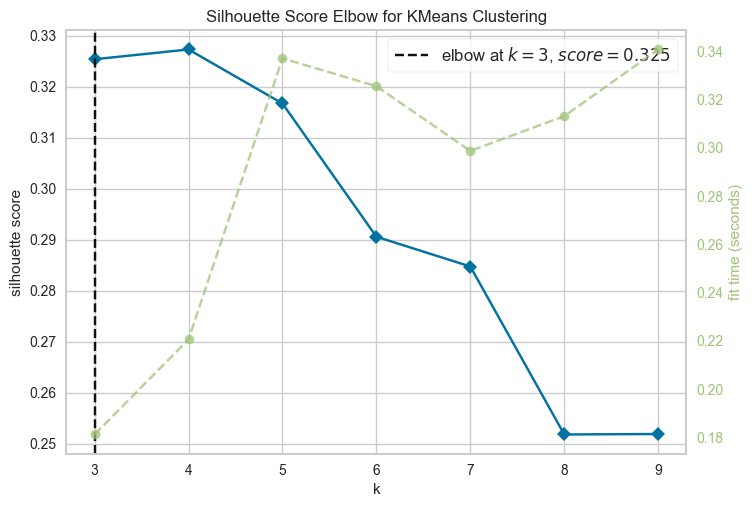

In [18]:
visualiser = KElbowVisualizer(KMeans(random_state=42, n_init=10), k=(3, 10), metric='silhouette').fit(data_scaled)
visualiser.show();

**Задание 4.6**  
Реализуйте сегментацию подростков на выбранном количестве кластеров.

Для каждого кластера составьте топ-10 самых частых слов, назовём их ключевыми. Для этого сгруппируйте данные по кластерам, в каждом кластере вычислите среднее по каждому признаку, отсортируйте данные по убыванию и выделите первые 10 строк.

Найдите среди ключевых слов те, которые характерны для каждого кластера, то есть встречаются в каждом из них.

In [19]:
best_clustering = KMeans(n_clusters=3, random_state=42).fit_predict(data_scaled)
data['kmeans_cluster'] = best_clustering

C:\Users\sadeyes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [39]:
grouped = data.groupby(by='kmeans_cluster')[data.columns.drop('kmeans_cluster')].mean().T
grouped.head()

kmeans_cluster,0,1,2
basketball,0.149095,0.668125,0.557811
football,0.149575,0.597274,0.521624
soccer,0.152585,0.470885,0.341571
softball,0.085191,0.431336,0.282436
volleyball,0.073239,0.400707,0.206531


In [41]:
top_list = []
for col in grouped.columns:
    top_10_set = set(grouped[col].sort_values(ascending=False).head(10).index)
    top_list.append(top_10_set)

set.intersection(*top_list)    

{'dance', 'god', 'hair', 'music'}

**Задание 4.7**  
Реализуйте EM-алгоритм (`GaussianMixture`) для такого же количества кластеров, как и в предыдущем задании. В качестве значения параметра `random_state` возьмите число 42.

Сколько подростков алгоритм отнёс к самому многочисленному кластеру?

In [44]:
em_model = GaussianMixture(n_components=3, random_state=42).fit(data_scaled)
clusters_em = pd.Series(em_model.predict(data_scaled))
clusters_em.value_counts(ascending=False)

0    20670
2     6456
1     2874
dtype: int64